### import dependencies

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### explore the data

In [49]:
df = pd.read_csv('../../zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [51]:
# function to calculate the percentage of missing values
def missing_percentage(df):
    total = df.isna().sum()[df.isna().sum() != 0]
    percent = round(total/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [52]:
missing_percentage(df)

,Total,Percent
rate,7775,15.03
phone,1208,2.34
location,21,0.04
rest_type,227,0.44
dish_liked,28078,54.29
cuisines,45,0.09
approx_cost(for two people),346,0.67


In [53]:
# function to show number of unique values in each column
def unique_values(df):
    num = df.nunique()
    percent = round(num/len(df)*100,2)
    return pd.concat([num, percent], axis=1, keys=['number','Percent'])
unique_values(df)   

,number,Percent
url,51717,100.00
address,11495,22.23
name,8792,17.00
online_order,2,0.00
book_table,2,0.00
rate,64,0.12
votes,2328,4.50
phone,14926,28.86
location,93,0.18
rest_type,93,0.18


In [54]:
len(df[df['menu_item'] == '[]'])

39617

In [55]:
df['listed_in(type)'].value_counts()

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: listed_in(type), dtype: int64

In [56]:
df['location'].nunique()

93

In [57]:
df['listed_in(city)'].nunique()

30

In [58]:
df[df['listed_in(city)'] != df['location']]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
29,https://www.zomato.com/bangalore/srinathjis-ca...,"112, Bull Temple Road,next to more Basavanagud...",Srinathji's Cafe,No,No,3.8/5,148,080 26600704\r\n+91 9342593424,Basavanagudi,"Casual Dining, Cafe","Paratha, Sandwich, Chilli Idli, Noodles, Sandw...","North Indian, Cafe, Chinese, Fast Food",550,"[('Rated 5.0', 'RATED\n No words for the pane...",[],Cafes,Banashankari
30,https://www.zomato.com/bangalore/redberrys-bas...,"30, Surveyor Street, DVG Road, Basavanagudi, B...",Redberrys,Yes,No,4.0/5,219,+91 9148421256,Basavanagudi,Cafe,"Pizza, Fries, Anjeer Ice Cream, Sandwiches, Ge...","Cafe, Italian",600,"[('Rated 4.0', ""RATED\n Redberrys will provid...",[],Cafes,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,NaN,North Indian,400,[],[],Dine-out,Whitefield
51645,https://www.zomato.com/bangalore/raapchick-bro...,"Opposite Brookefield Mall, Kundanhalli, Brooke...",Raapchick,Yes,No,3.6 /5,49,080 41717785\n+91 9571153004,Brookefield,Quick Bites,Burgers,"Fast Food, Burger",300,"[('Rated 5.0', ""RATED\n I was randomly lookin...","['Chicken Wrap', 'Veg Crunch Burger', 'Spicy P...",Dine-out,Whitefield
51681,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Drinks & nightlife,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


- drop highly missing columns (more than 50% missing values) -> **'dish_liked, 'menu_item'**
( note: **'menu_item'** has more than 75% missing values as '[]', so we will drop it )
- drop columns with high cardinality -> **'url', 'address', 'name', 'phone', 'reviews_list'**

In [59]:
df.drop(['address','dish_liked','menu_item','reviews_list'], axis=1, inplace=True)

In [60]:
df.head()

,url,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [61]:
df.duplicated(['name', 'location', 'phone']).sum()

34903

In [62]:
df[df.duplicated(['name','location', 'phone'])].sample(5)

,url,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
14134,https://www.zomato.com/bangalore/foodie-nation...,Foodie Nation,Yes,Yes,3.5/5,89,+91 9900074888\r\n+91 9900073888,Electronic City,Casual Dining,"North Indian, Chinese, Arabian","1,000",Dine-out,Electronic City
29846,https://www.zomato.com/bangalore/foodys-land-k...,Foody's Land,Yes,No,NaN,0,+91 9104208995,Koramangala 4th Block,Quick Bites,Fast Food,300,Delivery,Koramangala 5th Block
29399,https://www.zomato.com/bangalore/momoz-koraman...,Momoz,No,No,3.9 /5,626,080 41739353,Koramangala 5th Block,Casual Dining,"Chinese, Momos",600,Delivery,Koramangala 5th Block
47895,https://www.zomato.com/bangalore/magic-biryani...,Magic Biryani,No,No,NaN,0,+91 8904903456\n+91 8123155506,Richmond Road,Quick Bites,"Biryani, Kebab",150,Delivery,Residency Road
23537,https://www.zomato.com/bangalore/burrito-boys-...,Burrito Boys,Yes,No,3.0/5,6,+91 9740696592\r\n+91 9731974700,Bannerghatta Road,"Food Court, Quick Bites","Mexican, Tex-Mex",400,Dine-out,JP Nagar


In [63]:
df.drop_duplicates(['name', 'location', 'phone'], inplace=True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16814 entries, 0 to 51714
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          16814 non-null  object
 1   name                         16814 non-null  object
 2   online_order                 16814 non-null  object
 3   book_table                   16814 non-null  object
 4   rate                         14119 non-null  object
 5   votes                        16814 non-null  int64 
 6   phone                        16460 non-null  object
 7   location                     16803 non-null  object
 8   rest_type                    16727 non-null  object
 9   cuisines                     16785 non-null  object
 10  approx_cost(for two people)  16696 non-null  object
 11  listed_in(type)              16814 non-null  object
 12  listed_in(city)              16814 non-null  object
dtypes: int64(1), object(12)
memory 

### data cleaning

In [65]:
df.isna().sum()

url                               0
name                              0
online_order                      0
book_table                        0
rate                           2695
votes                             0
phone                           354
location                         11
rest_type                        87
cuisines                         29
approx_cost(for two people)     118
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [66]:
df.dropna(inplace=True)

In [67]:
# df['rate'] = df['rate'].fillna(df['rate'].mean())
# df['location'] = df['location'].fillna(df['location'].mode()[0])
# df['rest_type'] = df['rest_type'].fillna(df['rest_type'].mode()[0])
# df['cuisines'] = df['cuisines'].fillna(df['cuisines'].mode()[0])
# df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].mode()[0])

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13808 entries, 0 to 51677
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          13808 non-null  object
 1   name                         13808 non-null  object
 2   online_order                 13808 non-null  object
 3   book_table                   13808 non-null  object
 4   rate                         13808 non-null  object
 5   votes                        13808 non-null  int64 
 6   phone                        13808 non-null  object
 7   location                     13808 non-null  object
 8   rest_type                    13808 non-null  object
 9   cuisines                     13808 non-null  object
 10  approx_cost(for two people)  13808 non-null  object
 11  listed_in(type)              13808 non-null  object
 12  listed_in(city)              13808 non-null  object
dtypes: int64(1), object(12)
memory 

In [69]:
df.head()

,url,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [70]:
df['rate'] 

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51617    3.6 /5
51620    3.8 /5
51628    4.2 /5
51632    3.3 /5
51677    2.5 /5
Name: rate, Length: 13808, dtype: object

In [72]:
df['cuisines'] = df['cuisines'].apply(lambda x: tuple(map(str.strip, x.split(','))))


In [73]:
df = df.drop('location', axis=1)
df.drop(['name'], axis=1, inplace=True)
df.drop(['phone'], axis=1, inplace=True)

In [74]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: int(x.replace(',','')))
df['approx_cost(for two people)'].astype('float64')

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51617     300.0
51620     600.0
51628    1800.0
51632     350.0
51677     800.0
Name: approx_cost(for two people), Length: 13808, dtype: float64

In [75]:
df[['cuisines', 'rest_type']]

,cuisines,rest_type
0,"(North Indian, Mughlai, Chinese)",Casual Dining
1,"(Chinese, North Indian, Thai)",Casual Dining
2,"(Cafe, Mexican, Italian)","Cafe, Casual Dining"
3,"(South Indian, North Indian)",Quick Bites
4,"(North Indian, Rajasthani)",Casual Dining
...,...,...
51617,"(South Indian, North Indian)",Quick Bites
51620,"(Thai, Chinese, Momos)",Food Court
51628,"(North Indian, Continental, Asian)",Casual Dining
51632,"(North Indian, Kerala, Chinese)",Quick Bites


In [76]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb_df = mlb.fit_transform(df['cuisines'])
df.drop(['cuisines'], axis=1, inplace=True)
mlb_df = pd.DataFrame(mlb_df, columns=mlb.classes_)
mlb_df

,Afghan,Afghani,African,American,Andhra,Arabian,Asian,Assamese,Australian,Awadhi,...,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vietnamese,Wraps
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13805,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
mlb_df.to_csv('../data/cuisines.csv', index=False)

In [78]:
mlb.classes_

array(['Afghan', 'Afghani', 'African', 'American', 'Andhra', 'Arabian',
       'Asian', 'Assamese', 'Australian', 'Awadhi', 'BBQ', 'Bakery',
       'Bar Food', 'Belgian', 'Bengali', 'Beverages', 'Bihari', 'Biryani',
       'Bohri', 'British', 'Bubble Tea', 'Burger', 'Burmese', 'Cafe',
       'Cantonese', 'Charcoal Chicken', 'Chettinad', 'Chinese', 'Coffee',
       'Continental', 'Desserts', 'Drinks Only', 'European', 'Fast Food',
       'Finger Food', 'French', 'German', 'Goan', 'Greek', 'Grill',
       'Gujarati', 'Healthy Food', 'Hot dogs', 'Hyderabadi', 'Ice Cream',
       'Indian', 'Indonesian', 'Iranian', 'Italian', 'Japanese', 'Jewish',
       'Juices', 'Kashmiri', 'Kebab', 'Kerala', 'Konkan', 'Korean',
       'Lebanese', 'Lucknowi', 'Maharashtrian', 'Malaysian',
       'Mangalorean', 'Mediterranean', 'Mexican', 'Middle Eastern',
       'Mithai', 'Modern Indian', 'Momos', 'Mongolian', 'Mughlai', 'Naga',
       'Nepalese', 'North Eastern', 'North Indian', 'Oriya', 'Paan',
       '

In [79]:
df = df.reset_index(drop=True)
df = pd.concat([df, mlb_df], axis=1)
df

,url,online_order,book_table,rate,votes,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),Afghan,...,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vietnamese,Wraps
0,https://www.zomato.com/bangalore/jalsa-banasha...,Yes,Yes,4.1/5,775,Casual Dining,800,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
1,https://www.zomato.com/bangalore/spice-elephan...,Yes,No,4.1/5,787,Casual Dining,800,Buffet,Banashankari,0,...,0,0,0,0,1,0,0,0,0,0
2,https://www.zomato.com/SanchurroBangalore?cont...,Yes,No,3.8/5,918,"Cafe, Casual Dining",800,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
3,https://www.zomato.com/bangalore/addhuri-udupi...,No,No,3.7/5,88,Quick Bites,300,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
4,https://www.zomato.com/bangalore/grand-village...,No,No,3.8/5,166,Casual Dining,600,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13803,https://www.zomato.com/bangalore/breakfast-hou...,No,No,3.6 /5,49,Quick Bites,300,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0
13804,https://www.zomato.com/bangalore/fujian-expres...,Yes,No,3.8 /5,182,Food Court,600,Dine-out,Whitefield,0,...,0,0,0,0,1,0,0,0,0,0
13805,https://www.zomato.com/bangalore/nook-aloft-be...,No,Yes,4.2 /5,411,Casual Dining,1800,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0
13806,https://www.zomato.com/bangalore/seeya-restaur...,No,No,3.3 /5,4,Quick Bites,350,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df_test = df[df['rate'].isin(['NEW', np.nan])].copy()

In [81]:
df = df.drop(df[df['rate'] == np.nan].index, axis=0)
df = df.drop(df[df['rate'] == '-'].index, axis=0)

In [82]:
df['rate'] = df['rate'].apply(lambda x: float(x.split('/')[0]) if str(x) != 'NEW' else np.nan)

In [83]:
df_test

,url,online_order,book_table,rate,votes,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),Afghan,...,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vietnamese,Wraps
70,https://www.zomato.com/bangalore/spicy-tandoor...,No,No,NEW,0,Quick Bites,150,Delivery,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
73,https://www.zomato.com/bangalore/om-sri-vinaya...,No,No,NEW,0,"Takeaway, Delivery",500,Delivery,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
102,https://www.zomato.com/bangalore/hari-super-sa...,No,No,NEW,0,"Takeaway, Delivery",200,Delivery,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
111,https://www.zomato.com/bangalore/roll-magic-fa...,No,No,NEW,0,"Takeaway, Delivery",200,Delivery,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
112,https://www.zomato.com/bangalore/foodlieious-m...,No,No,NEW,0,Quick Bites,100,Delivery,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13665,https://www.zomato.com/bangalore/nawab-di-biry...,Yes,No,NEW,0,"Takeaway, Delivery",400,Delivery,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0
13666,https://www.zomato.com/bangalore/ind-foodies-1...,No,No,NEW,0,Delivery,300,Delivery,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0
13673,https://www.zomato.com/bangalore/baskin-robbin...,Yes,No,NEW,0,Food Court,300,Desserts,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0
13716,https://www.zomato.com/bangalore/punjab-beat-1...,Yes,Yes,NEW,0,Casual Dining,700,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df = df.dropna()
df.reset_index(drop=True, inplace=True)

In [85]:
df

,url,online_order,book_table,rate,votes,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),Afghan,...,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vietnamese,Wraps
0,https://www.zomato.com/bangalore/jalsa-banasha...,Yes,Yes,4.1,775,Casual Dining,800,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
1,https://www.zomato.com/bangalore/spice-elephan...,Yes,No,4.1,787,Casual Dining,800,Buffet,Banashankari,0,...,0,0,0,0,1,0,0,0,0,0
2,https://www.zomato.com/SanchurroBangalore?cont...,Yes,No,3.8,918,"Cafe, Casual Dining",800,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
3,https://www.zomato.com/bangalore/addhuri-udupi...,No,No,3.7,88,Quick Bites,300,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
4,https://www.zomato.com/bangalore/grand-village...,No,No,3.8,166,Casual Dining,600,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12924,https://www.zomato.com/bangalore/breakfast-hou...,No,No,3.6,49,Quick Bites,300,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0
12925,https://www.zomato.com/bangalore/fujian-expres...,Yes,No,3.8,182,Food Court,600,Dine-out,Whitefield,0,...,0,0,0,0,1,0,0,0,0,0
12926,https://www.zomato.com/bangalore/nook-aloft-be...,No,Yes,4.2,411,Casual Dining,1800,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0
12927,https://www.zomato.com/bangalore/seeya-restaur...,No,No,3.3,4,Quick Bites,350,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12929 entries, 0 to 12928
Columns: 115 entries, url to Wraps
dtypes: float64(1), int32(106), int64(2), object(6)
memory usage: 6.1+ MB


In [87]:
# df.to_csv('../data/zomato_cleaned.csv', index=False)
# df_test.to_csv('../data/zomato_new.csv', index=False)

### EDA

In [100]:
df = pd.read_csv('../data/zomato_cleaned.csv')
df.head()

,url,online_order,book_table,rate,votes,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),Afghan,...,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vietnamese,Wraps
0,https://www.zomato.com/bangalore/jalsa-banasha...,Yes,Yes,4.1,775,Casual Dining,800,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
1,https://www.zomato.com/bangalore/spice-elephan...,Yes,No,4.1,787,Casual Dining,800,Buffet,Banashankari,0,...,0,0,0,0,1,0,0,0,0,0
2,https://www.zomato.com/SanchurroBangalore?cont...,Yes,No,3.8,918,"Cafe, Casual Dining",800,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
3,https://www.zomato.com/bangalore/addhuri-udupi...,No,No,3.7,88,Quick Bites,300,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
4,https://www.zomato.com/bangalore/grand-village...,No,No,3.8,166,Casual Dining,600,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0


#### What is the distribution of restaurants across different localities in Bengaluru? Which locality has the highest number of restaurants?

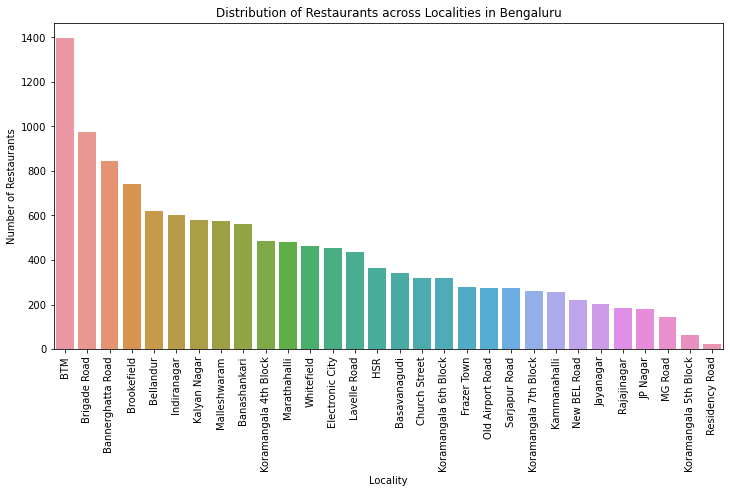

The locality with the highest number of restaurants is BTM with 1395 restaurants.


In [101]:
locality_counts = df['listed_in(city)'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=locality_counts.index, y=locality_counts.values)
plt.title('Distribution of Restaurants across Localities in Bengaluru')
plt.xlabel('Locality')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.show()

max_locality = locality_counts.idxmax()
max_count = locality_counts.max()
print(f"The locality with the highest number of restaurants is {max_locality} with {max_count} restaurants.")

#### What is the distribution of restaurant types in Bengaluru? Which type of restaurant is the most popular?

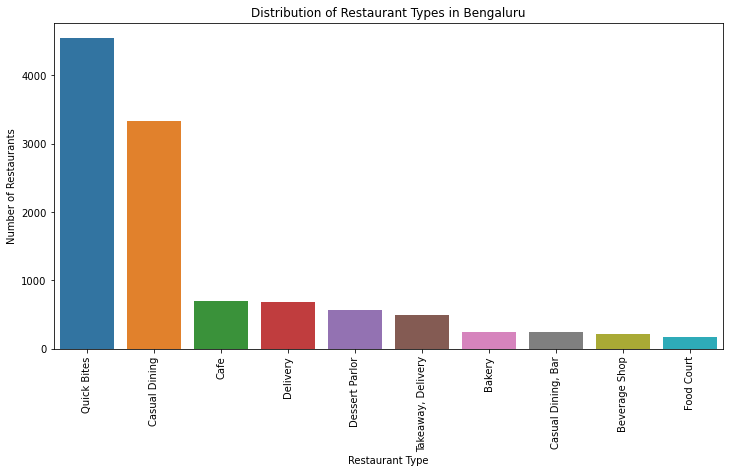

The most popular restaurant type is Quick Bites with 4548 restaurants.


In [102]:
# Group the restaurants by type and count the number of restaurants in each type
restaurant_types = df['rest_type'].value_counts()[:10]

# Plot the distribution of restaurant types
plt.figure(figsize=(12, 6))
sns.barplot(x=restaurant_types.index, y=restaurant_types.values)
plt.title('Distribution of Restaurant Types in Bengaluru')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.show()

# Find the most popular restaurant type
most_popular_type = restaurant_types.idxmax()
most_popular_count = restaurant_types.max()
print(f"The most popular restaurant type is {most_popular_type} with {most_popular_count} restaurants.")


#### What is the average cost for two people at restaurants in Bengaluru? How does this cost vary across different localities and restaurant types?

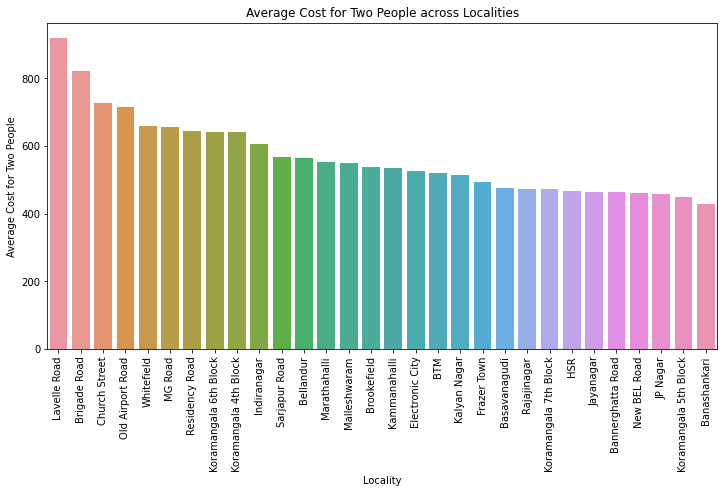

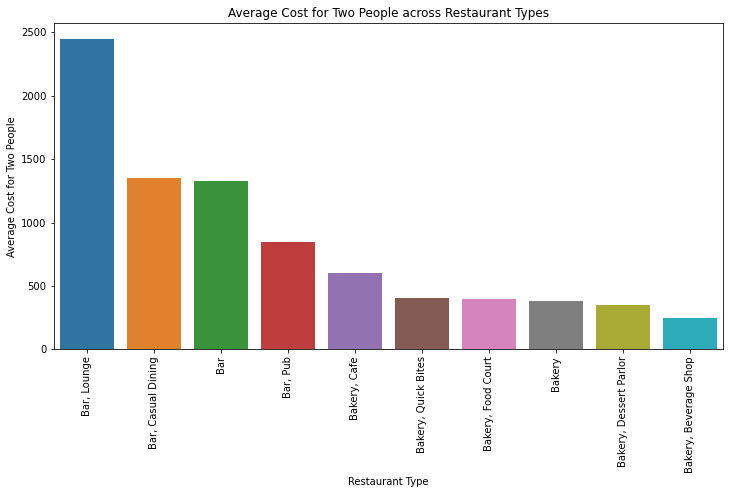

In [103]:
locality_avg_cost = df.groupby('listed_in(city)')['approx_cost(for two people)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=locality_avg_cost.index, y=locality_avg_cost.values)
plt.title('Average Cost for Two People across Localities')
plt.xlabel('Locality')
plt.ylabel('Average Cost for Two People')
plt.xticks(rotation=90)
plt.show()

type_avg_cost = df.groupby('rest_type')['approx_cost(for two people)'].mean()[:10].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=type_avg_cost.index, y=type_avg_cost.values)
plt.title('Average Cost for Two People across Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Cost for Two People')
plt.xticks(rotation=90)
plt.show()

### Top most popular cuisines ?

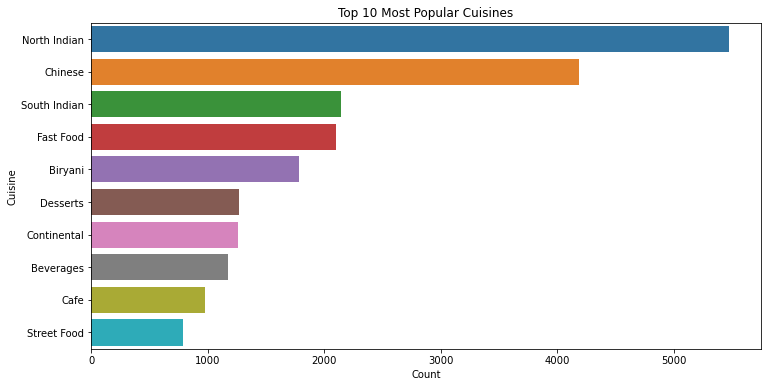

In [104]:
cuisine_count = df.iloc[:, 9:].sum().sort_values(ascending=False)[:10]
# Plot the top 10 most popular cuisines
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_count.values, y=cuisine_count.index)
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.show()


#### What is the distribution of restaurant ratings in Bengaluru? Are there any factors associated with higher ratings, such as location or price?

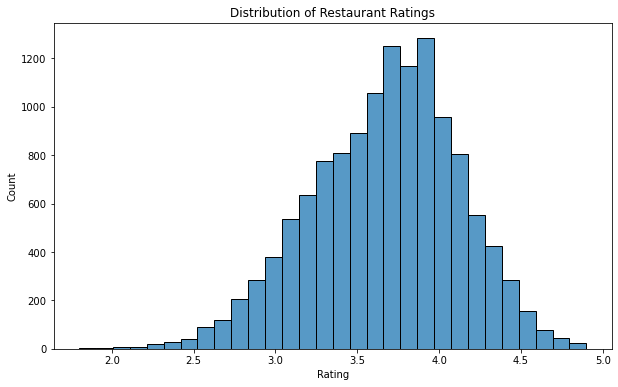

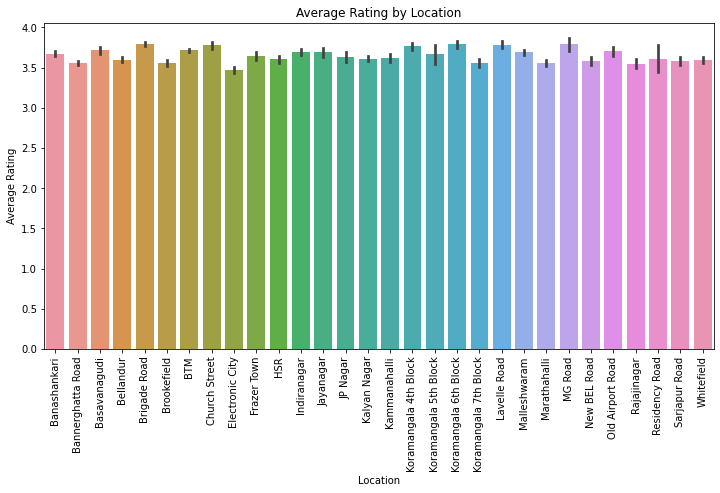

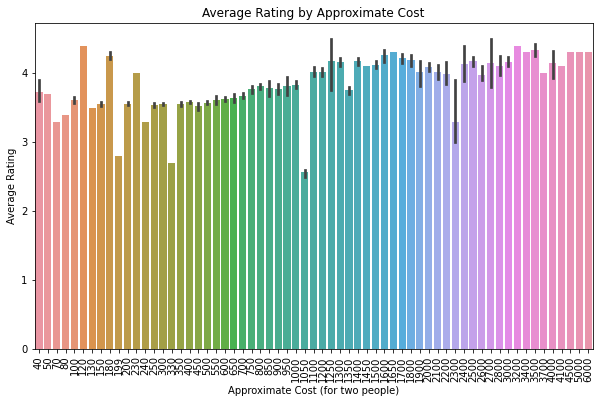

In [105]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='rate', bins=30)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='listed_in(city)', y='rate')
plt.title('Average Rating by Location')
plt.xlabel('Location')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='approx_cost(for two people)', y='rate')
plt.title('Average Rating by Approximate Cost')
plt.xlabel('Approximate Cost (for two people)')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

#### Are there any correlations between restaurant attributes such as online ordering and table booking etc...? 

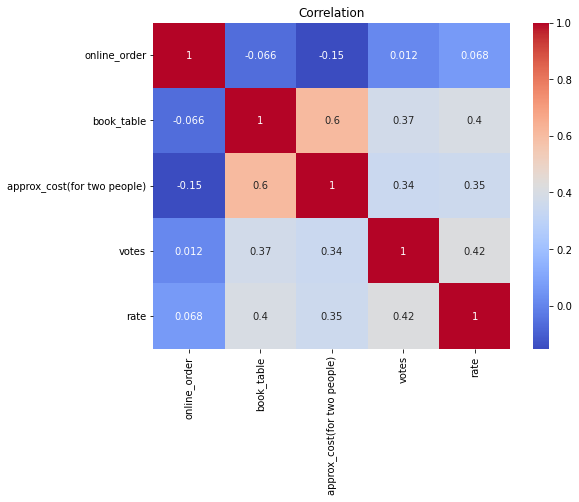

In [106]:
def make_corr_heatmap(df):
    df_copy = df.copy()
    df_copy['online_order'] = df['online_order'].replace({'Yes': 1, 'No': 0})
    df_copy['book_table'] = df['book_table'].replace({'Yes': 1, 'No': 0})
    correlation_matrix = df_copy[['online_order', 'book_table', 'approx_cost(for two people)', 'votes', 'rate']].corr()
    return correlation_matrix

plt.figure(figsize=(8, 6))
sns.heatmap(make_corr_heatmap(df), annot=True, cmap='coolwarm')
plt.title('Correlation')
plt.show()

#### Are there any cities that tend to have higher-priced restaurants?

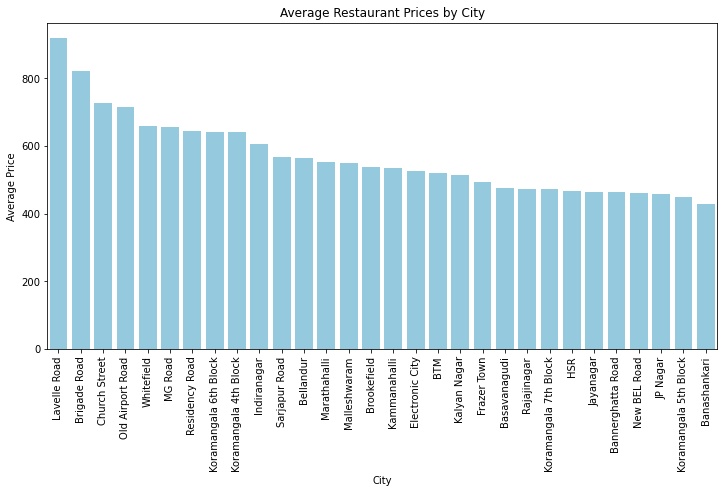

In [107]:
city_prices = df.groupby('listed_in(city)')['approx_cost(for two people)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=city_prices.index, y=city_prices.values, color='skyblue')
plt.title('Average Restaurant Prices by City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()


#### Are there any differences in the number of votes based on restaurant types?

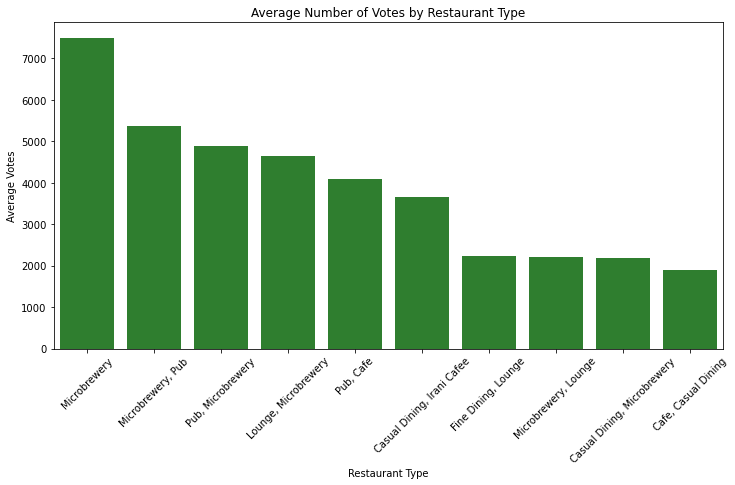

In [108]:
type_votes = df.groupby('rest_type')['votes'].mean().sort_values(ascending=False)[:10]

# Plot the average number of votes for each restaurant type using seaborn
plt.figure(figsize=(12,6))
sns.barplot(x=type_votes.index, y=type_votes.values, color='forestgreen')
plt.title('Average Number of Votes by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Votes')
plt.xticks(rotation=45)
plt.show()